In [168]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Matplotlib: ', matplotlib.__version__)

Numpy:  1.19.2
Pandas:  1.1.3
Matplotlib:  3.3.2


In [169]:
pip install imbalanced-learn

In [170]:
import imblearn

In [171]:
from imblearn.over_sampling import SMOTE

### Load the Data

In [172]:
#Read dataset train.csv and test.csv

df_1 = pd.read_csv(r'C:\Users\gurme\OneDrive\Documents\fraudTrain.csv\fraudTrain.csv')
df_1 = df_1.drop(df_1.columns[0], axis=1)

df_2 = pd.read_csv(r'C:\Users\gurme\OneDrive\Documents\fraudTest.csv\fraudTest.csv')
df_2 = df_2.drop(df_2.columns[0], axis=1)

df = pd.concat([df_1,df_2])

In [173]:

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Exploratory Data Analysis

In [174]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [175]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [176]:
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [177]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


### Feature Engineering

In [178]:
df["trans_date_trans_time"] = pd.to_datetime(df['trans_date_trans_time'])

In [179]:
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [180]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

In [181]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [182]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

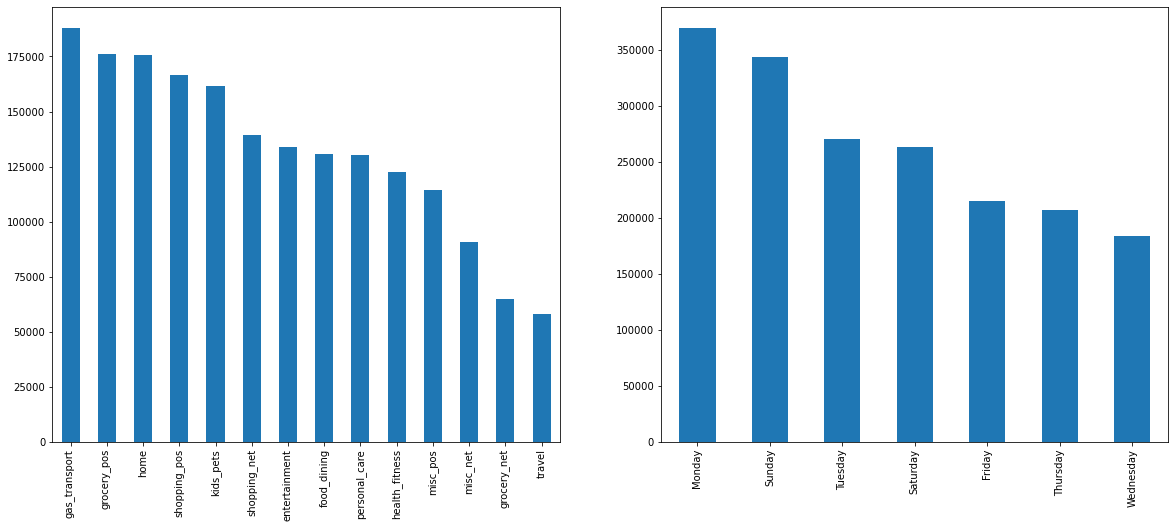

In [183]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

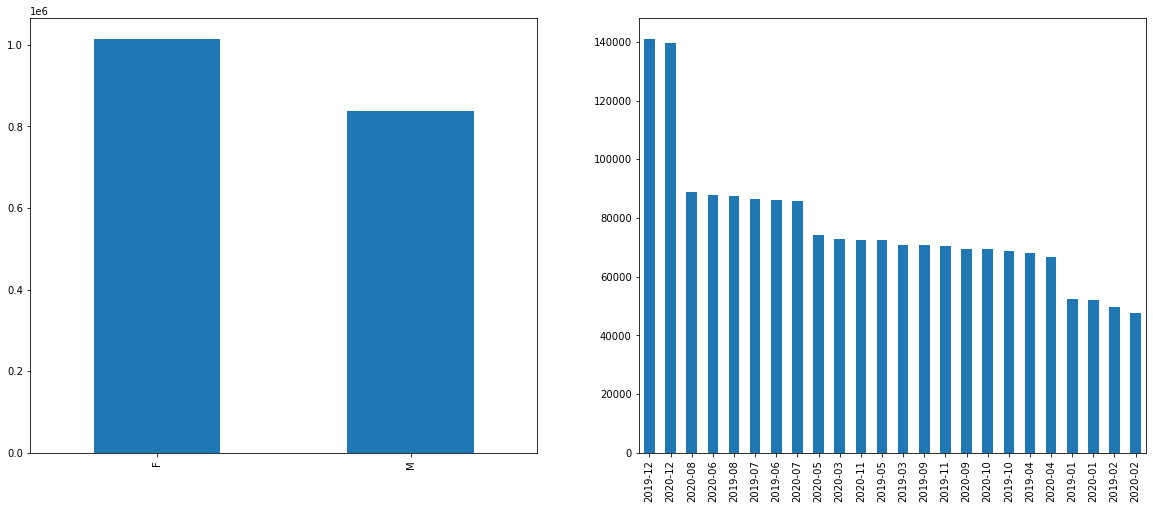

In [184]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();

<AxesSubplot:>

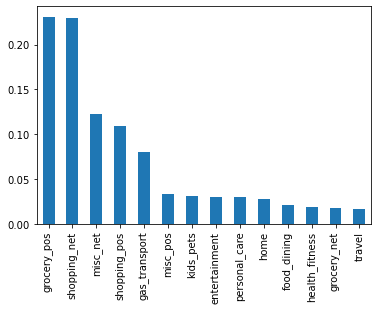

In [185]:
df[(df['is_fraud']==1)].category.value_counts(normalize= True, ascending= False).plot(kind='bar')

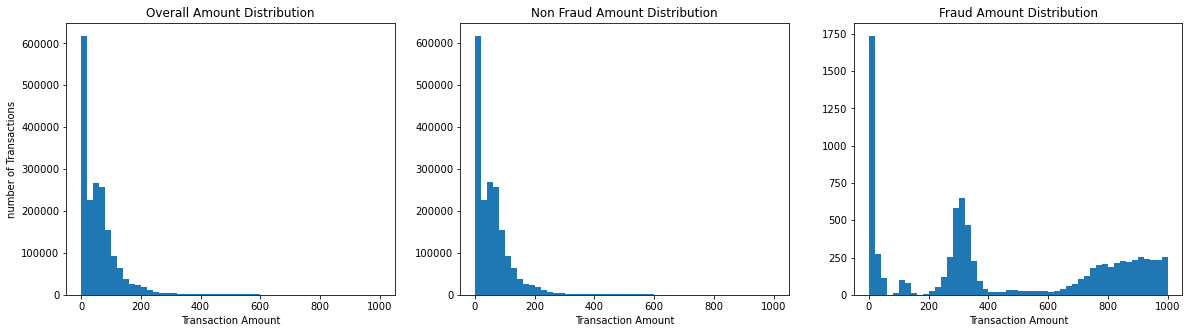

In [186]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1000]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1000)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1000)]['amt'], bins=50)

ax[0].set_title('Overall Amount Distribution')
ax[1].set_title('Non Fraud Amount Distribution')
ax[2].set_title('Fraud Amount Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('number of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

In [187]:
df['hourEnc'] = 0
df.loc[df.trans_hour < 5,'hourEnc'] = 1
df.loc[df.trans_hour > 21,'hourEnc'] = 1

In [188]:
df.index = pd.to_datetime(df['trans_date_trans_time'])
df = df.rename_axis(index={'trans_date_trans_time': 'time_index'})
df = df.sort_index()
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,hourEnc
time_index,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,1
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,1
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,1
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,1
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,1


In [189]:
#Extract frequencies of transactions in last 60 days
df['val_for_agg'] = 1

In [190]:
#60 days transactions by customer
df_hist_trans_60d = \
    df \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [191]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [192]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [193]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.0
1,60416207185,2019-01-02,1.0
2,60416207185,2019-01-03,5.0
3,60416207185,2019-01-04,7.0
4,60416207185,2019-01-05,9.0


In [194]:
#1day transactions by customer

df_hist_trans_24h = \
    df \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [195]:
df_hist_trans_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.0
1,60416207185,2019-01-02 08:44:57,1.0
2,60416207185,2019-01-02 08:47:36,2.0
3,60416207185,2019-01-02 12:38:14,3.0
4,60416207185,2019-01-02 13:10:46,4.0


In [196]:
#fraud transactions in last 24h
df_hist_fraud_trans_24h = \
    df[df['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [197]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,3.0
4,60416207185,2019-03-02 22:10:59,2.0


In [198]:
#fraud transactions in last 2h
df_hist_fraud_trans_2h = \
    df[df['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [199]:
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,1.0
4,60416207185,2019-03-02 22:10:59,1.0


In [200]:
#60 Day trans Amt Avg by Customers
df_hist_trans_amt_avg_60d = \
    df \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [201]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [202]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [203]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


In [204]:
#Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']
df['trans_date'] = df['trans_date_trans_time'].dt.date

In [205]:
df1 = df.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [206]:
df1 = df1.merge(df_hist_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df1 = df1.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df1 = df1.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df1 = df1.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [207]:
df1[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df1[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [208]:
df1['hist_fraud_trans_24h'] = df1['hist_fraud_trans_24h'] - df1['hist_fraud_trans_2h']

In [209]:
def timeDifference(x):
    x['time_diff'] = x.trans_date_trans_time - x.trans_date_trans_time.shift()
    return x

In [210]:
df1 = df1.groupby('cc_num').apply(timeDifference)

In [211]:
df1['time_diff'] = df1['time_diff'].dt.seconds

In [212]:
df1

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,year_month,hourEnc,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d,time_diff
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,2019-01,1,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000,NaN
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,2019-01,1,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,2019-01,1,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000,NaN
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,2019-01,1,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,2019-01,1,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852477,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,2020-12,1,1,2020-12-31,246.0,4.0,0.0,0.0,62.633684,16630.0
1852478,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,2020-12,1,1,2020-12-31,422.0,8.0,0.0,0.0,48.529764,9743.0
1852479,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,2020-12,1,1,2020-12-31,400.0,8.0,0.0,0.0,93.296325,724.0
1852480,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,2020-12,1,1,2020-12-31,318.0,3.0,0.0,0.0,59.034455,12025.0


In [213]:
df1['merchant'] = df1['merchant'].str.strip('fraud_')

In [214]:
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df1['gender'] = df1['gender'].transform(gender_binarizer)

In [215]:
df1['dob'] = pd.to_datetime(df1['dob'])

In [216]:
df1['age'] = np.round((df1['trans_date_trans_time'] - df1['dob'])/np.timedelta64(1,'Y'))
df1['age']

0          31.0
1          41.0
2          57.0
3          52.0
4          33.0
           ... 
1852477    55.0
1852478    21.0
1852479    39.0
1852480    55.0
1852481    28.0
Name: age, Length: 1852482, dtype: float64

In [217]:
df1['age'].describe()

count    1.852482e+06
mean     4.626600e+01
std      1.741225e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

In [218]:
category_onehot = pd.get_dummies(df1.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df1.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df1.day_of_week, prefix='week',drop_first=True)

In [219]:
df1 = pd.concat([df1, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [220]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [221]:
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [222]:
df1['dist'].describe()

count    1.852482e+06
mean     7.611184e+01
std      2.911689e+01
min      2.225452e-02
25%      5.532041e+01
50%      7.821664e+01
75%      9.850959e+01
max      1.521172e+02
Name: dist, dtype: float64

In [223]:
df1

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_shopping_pos,category_travel,gender_1,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,...,0,0,1,0,0,0,0,1,0,78.597568
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,0,0,1,0,0,0,0,1,0,30.212176
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,1,0,108.206083
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,0,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,1,0,95.673231
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,0,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,0,0,1,0,77.556744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852477,2020-12-31 23:59:07,30560609640617,Reilly and Sons,health_fitness,43.77,Michael,Olson,0,558 Michael Estates,Luray,...,0,0,0,0,0,0,1,0,0,77.026148
1852478,2020-12-31 23:59:09,3556613125071656,Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,0,572 Davis Mountains,Lake Jackson,...,0,0,0,0,0,0,1,0,0,100.074420
1852479,2020-12-31 23:59:15,6011724471098086,Rau-Robel,kids_pets,86.88,Ann,Lawson,1,144 Evans Islands Apt. 683,Burbank,...,0,0,1,0,0,0,1,0,0,80.759302
1852480,2020-12-31 23:59:24,4079773899158,Breitenberg LLC,travel,7.99,Eric,Preston,0,7020 Doyle Stream Apt. 951,Mesa,...,0,1,0,0,0,0,1,0,0,52.933240


In [224]:
df1.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

In [225]:
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'hourEnc', 'val_for_agg', 'trans_date', 'hist_trans_60d',
       'hist_trans_24h', 'hist_fraud_trans_24h', 'hist_fraud_trans_2h',
       'hist_trans_avg_amt_60d', 'time_diff', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_1', 'week_Monday',
       'week_Saturday', 'week_Sunday', 'week_Thursday', 'week_Tuesday',
       'week_Wednesday', 'dist'],
      dtype='object')

In [226]:
cols = ['amt', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'hourEnc', 'trans_date', 'hist_trans_60d',
       'hist_trans_24h', 'hist_fraud_trans_24h', 'hist_fraud_trans_2h',
       'hist_trans_avg_amt_60d', 'time_diff', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_1', 'week_Monday',
       'week_Saturday', 'week_Sunday', 'week_Thursday', 'week_Tuesday',
       'week_Wednesday', 'dist']

In [227]:
corr = df1[cols].corr()

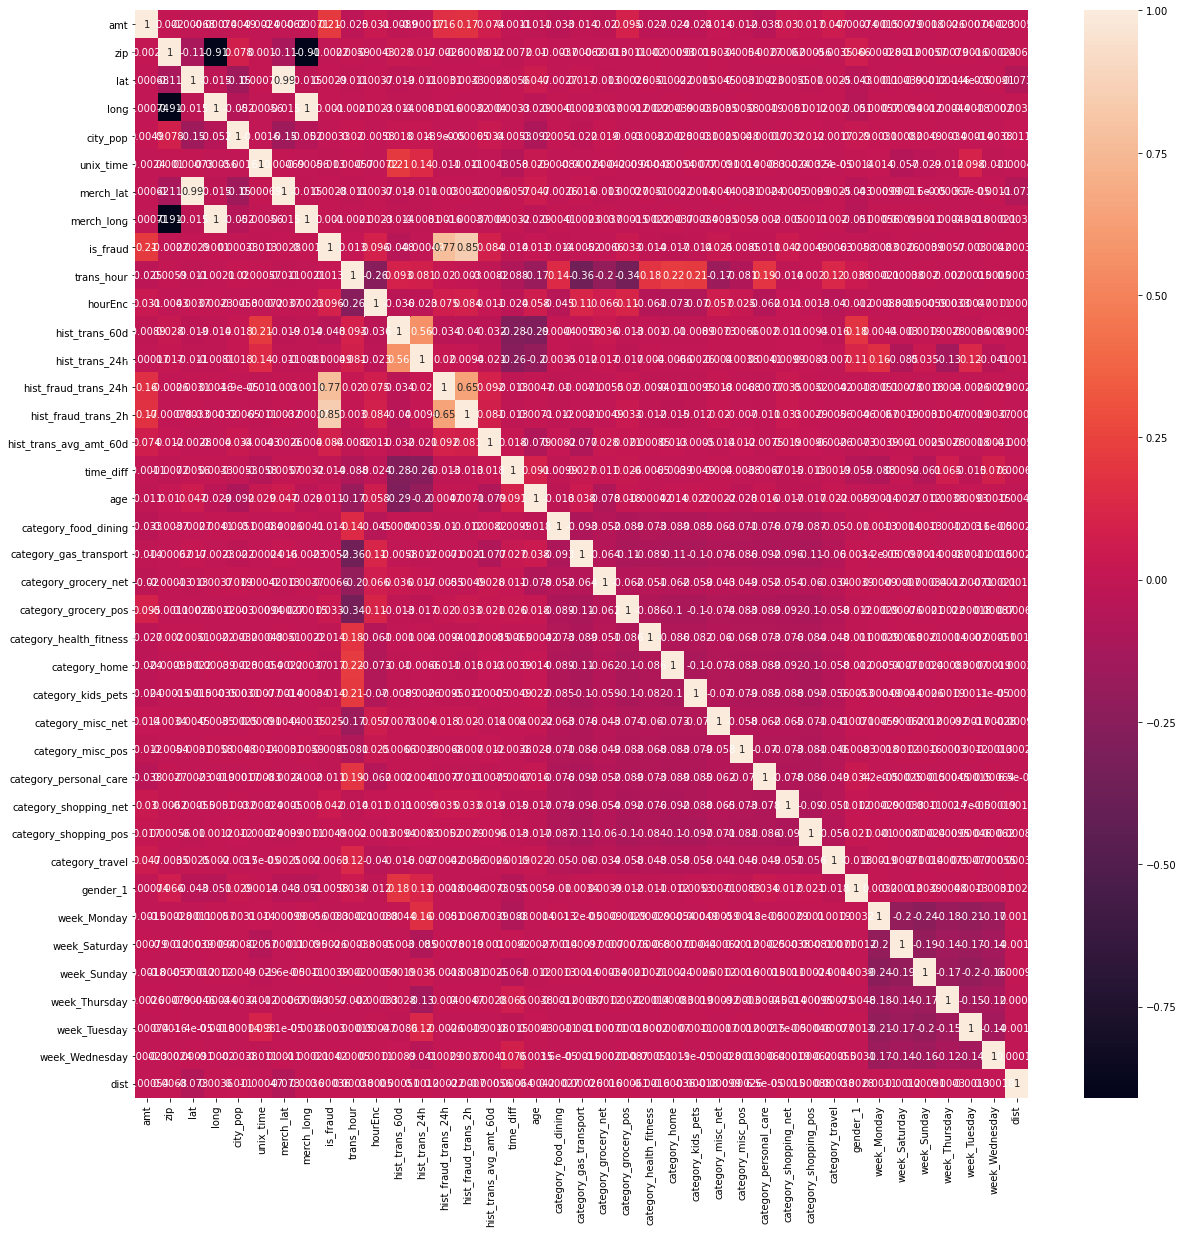

In [228]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

In [229]:
df1.corr()['is_fraud'].abs().sort_values(ascending=False)

is_fraud                   1.000000
hist_fraud_trans_2h        0.848213
hist_fraud_trans_24h       0.772578
amt                        0.209307
hourEnc                    0.095764
hist_trans_avg_amt_60d     0.084064
hist_trans_60d             0.047788
category_shopping_net      0.042452
category_grocery_pos       0.033483
category_misc_net          0.024667
category_home              0.016623
time_diff                  0.014310
category_kids_pets         0.014307
category_food_dining       0.013939
category_health_fitness    0.013681
unix_time                  0.013330
trans_hour                 0.013196
category_personal_care     0.011378
age                        0.010686
category_misc_pos          0.008514
week_Monday                0.008270
category_grocery_net       0.006649
category_travel            0.006286
gender                     0.005844
gender_1                   0.005844
week_Thursday              0.005712
category_gas_transport     0.005155
category_shopping_pos      0

In [140]:
df2 = df1.copy()

In [141]:
df1.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

In [151]:
#defining the variables
x = df1[['amt','hourEnc', 'hist_trans_60d',
       'hist_trans_24h', 'hist_fraud_trans_24h',
       'hist_trans_avg_amt_60d', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_1', 'week_Monday',
       'week_Saturday', 'week_Sunday', 'week_Thursday', 'week_Tuesday',
       'week_Wednesday']]
y = df1['is_fraud']

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, random_state=42)

In [154]:
from sklearn.preprocessing import RobustScaler

In [155]:
scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\gurme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[552821     16]
 [   604   2304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.99      0.79      0.88      2908

    accuracy                           1.00    555745
   macro avg       1.00      0.90      0.94    555745
weighted avg       1.00      1.00      1.00    555745



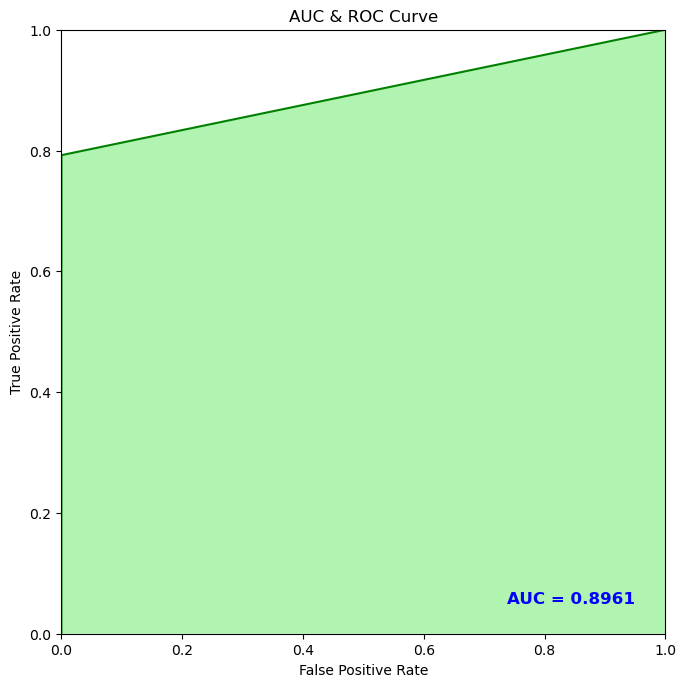

In [158]:
#Logistic Regression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_test_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

auc = metrics.roc_auc_score(y_test, y_test_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

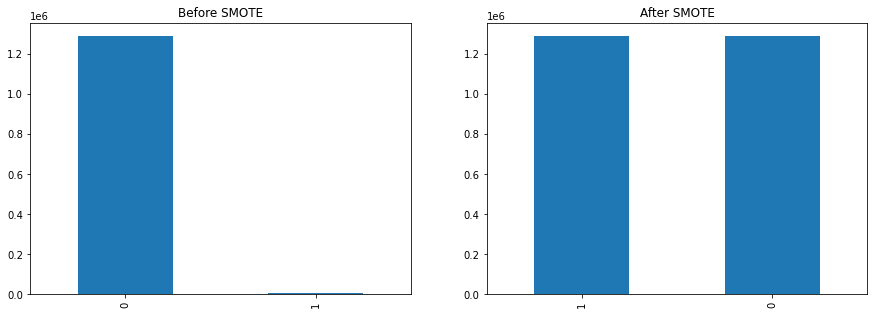

In [159]:
sm = SMOTE()
x_train_new,y_train_new= sm.fit_resample(x_train,y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [160]:
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

C:\Users\gurme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[542322  10515]
 [   207   2701]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552837
           1       0.20      0.93      0.34      2908

    accuracy                           0.98    555745
   macro avg       0.60      0.95      0.66    555745
weighted avg       1.00      0.98      0.99    555745



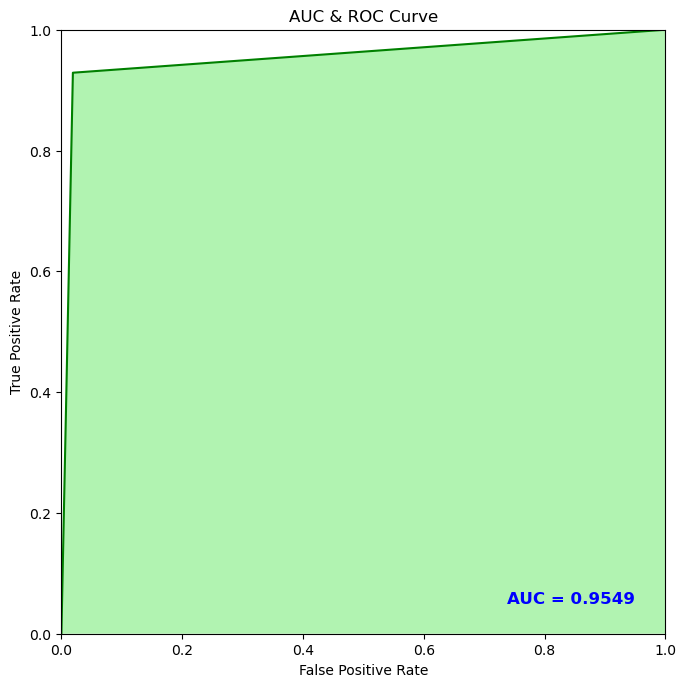

In [161]:
#Building a Logistic Regression Model


classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_test_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

auc = metrics.roc_auc_score(y_test, y_test_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [162]:
classifier.score(x_test,y_test)

0.9807069789201882

[[549347   3490]
 [   367   2541]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    552837
           1       0.42      0.87      0.57      2908

    accuracy                           0.99    555745
   macro avg       0.71      0.93      0.78    555745
weighted avg       1.00      0.99      0.99    555745



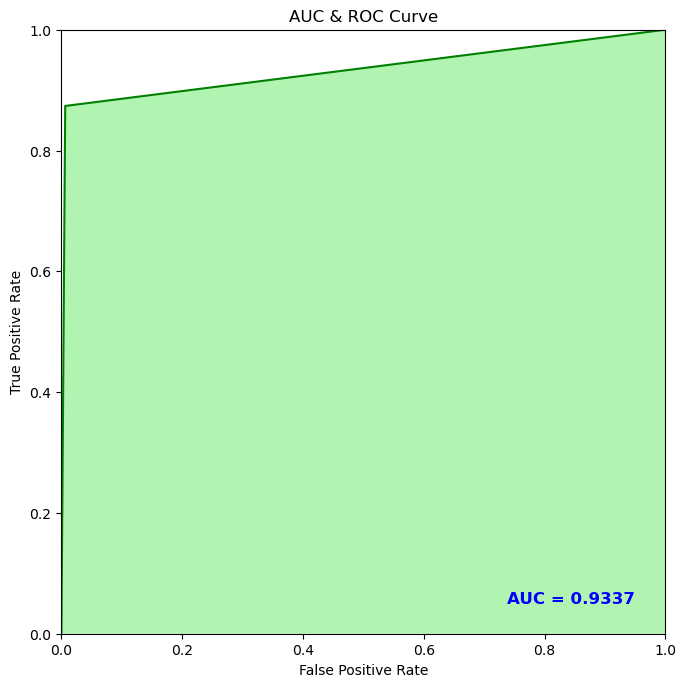

In [165]:
#Naive Bayes model
nb = GaussianNB()
model_1 = nb.fit(x_train,y_train)

y_test_pred = model_1.predict(x_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

auc = metrics.roc_auc_score(y_test, y_test_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [164]:
model_1.score(x_test,y_test)

0.9930597666195827